In [1]:
import pandas as pd #for dealing with data as tables
import matplotlib.pyplot as plt #for visualization

%matplotlib inline
import hddm
print hddm.__version__

0.6.0


/Users/mimburgi/anaconda3/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
data = hddm.load_csv('./input.csv')

In [3]:
model_simple = hddm.HDDM(data) #resp boundary and drift rate don't vary, for comparison
model_simple.find_starting_values() #get starting sampling values
model_simple.sample(10000, burn=1000) #fit the model

model_session = hddm.HDDM(data, depends_on={'v': 'session', 'a': 'session'}) #resp boundary and drift rate vary by session only, for comparison
model_session.find_starting_values() #get starting sampling values
model_session.sample(10000, burn=1000) #fit the model

model_full = hddm.HDDM(data, depends_on={'v': 'fullinter', 'a': 'fullinter'}) #resp boundary and drift rate vary by all conditions
model_full.find_starting_values() #get starting sampling values
model_full.sample(10000, burn=1000) #fit the model

-15060.2838884
-15060.2802142
 [-----------------100%-----------------] 10000 of 10000 complete in 896.7 sec-14973.7201398
-14973.6961349
 [-----------------100%-----------------] 10000 of 10000 complete in 861.9 sec-14761.8459129
-14761.8281061
 [-----------------100%-----------------] 10000 of 10000 complete in 850.5 sec

In [4]:
#compare models, lower is better so the full model is best
print "Simplest model DIC: %f" % model_simple.dic
print "Session only model DIC: %f" % model_session.dic
print "Full model DIC: %f" % model_full.dic

#this one puts a penalty on more complexity, still looks like the full model is best
print "Simplest model BIC: %f" % model_simple.bic
print "Session only model BIC: %f" % model_session.bic
print "Full model BIC: %f" % model_full.bic


Simplest model DIC: 30121.804412
Session only model DIC: 29946.730458
Full model DIC: 29512.356106
Simplest model BIC: 30145.889855
Session only model BIC: 29987.017979
Full model BIC: 29649.124392


Plotting a(1.A.adaptive)
Plotting a(1.A.two)
Plotting a(1.S.adaptive)
Plotting a(1.S.two)
Plotting a(2.A.adaptive)
Plotting a(2.A.two)
Plotting a(2.S.adaptive)
Plotting a(2.S.two)
Plotting v(1.A.adaptive)
Plotting v(1.A.two)
Plotting v(1.S.adaptive)
Plotting v(1.S.two)
Plotting v(2.A.adaptive)
Plotting v(2.A.two)
Plotting v(2.S.adaptive)
Plotting v(2.S.two)
Plotting t


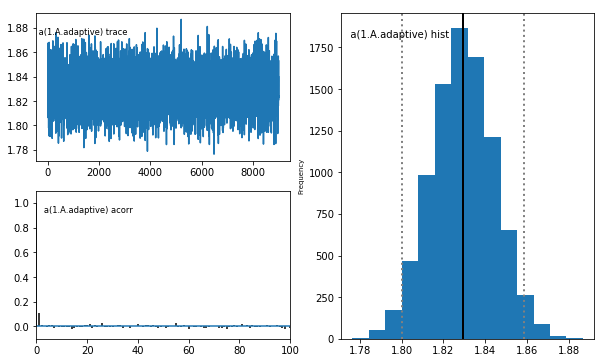

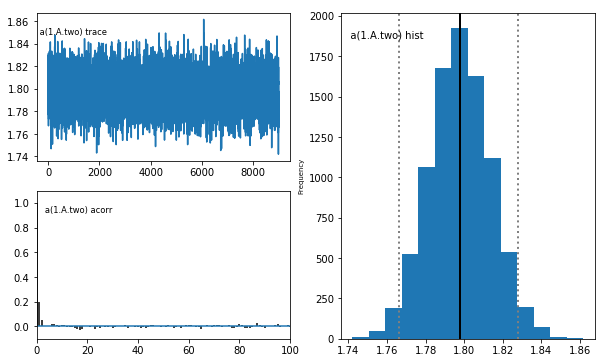

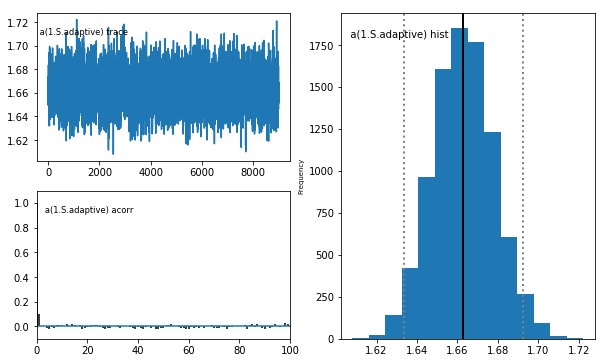

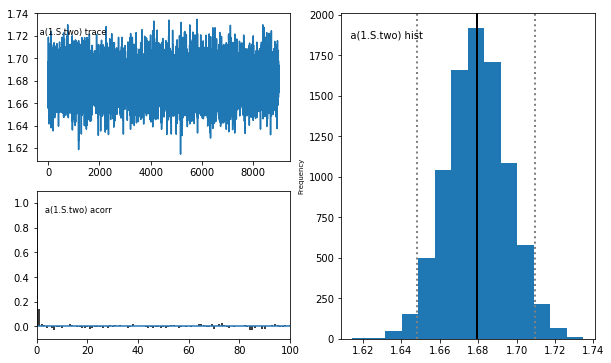

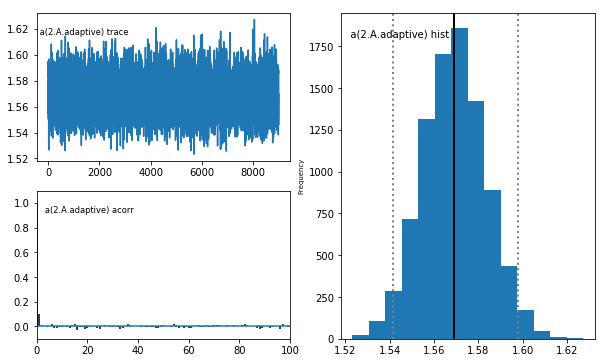

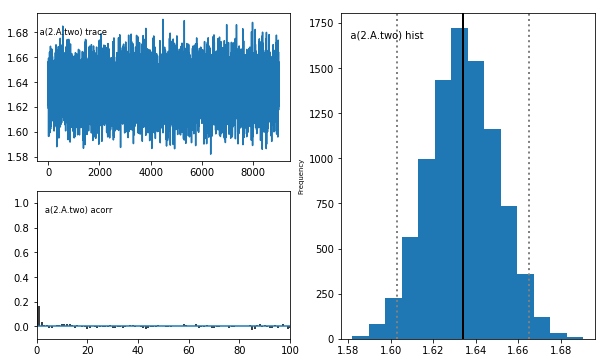

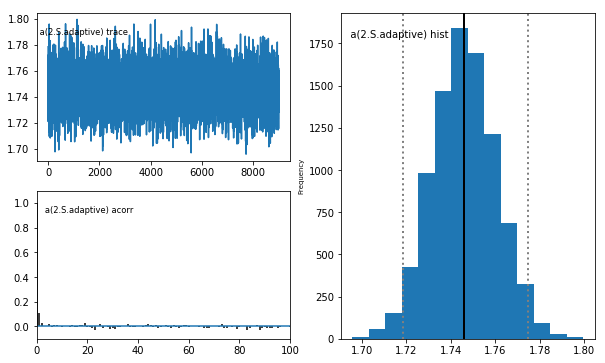

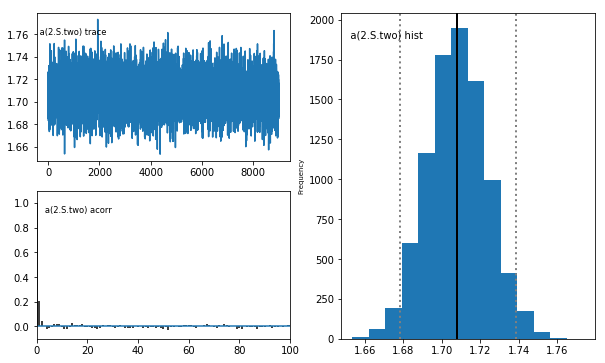

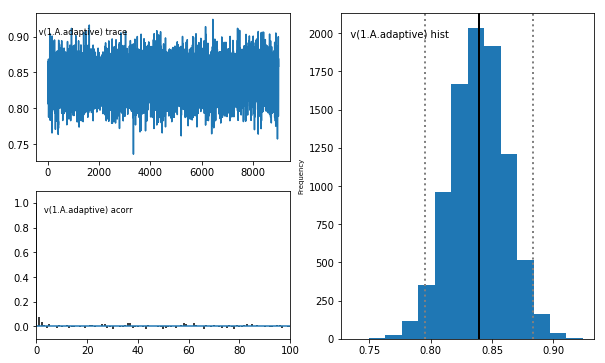

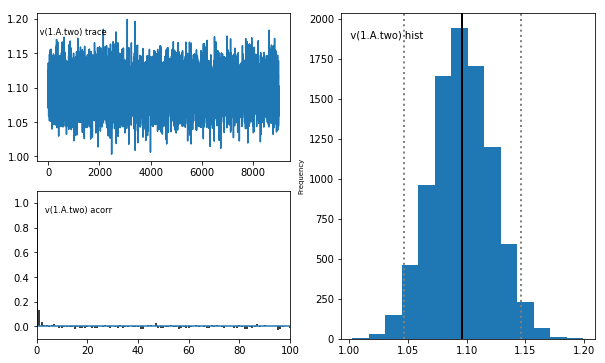

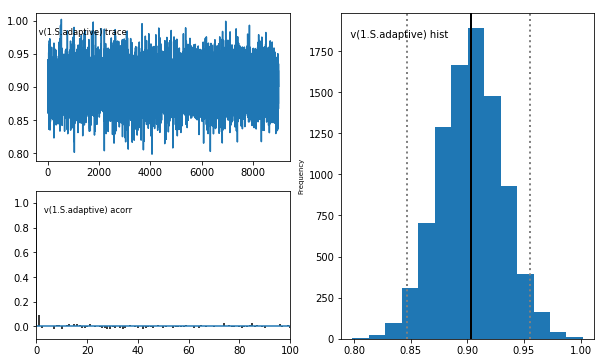

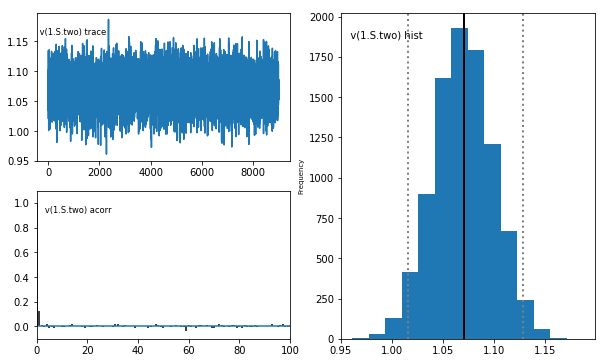

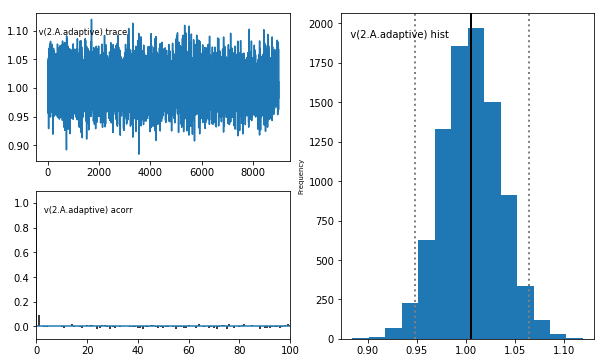

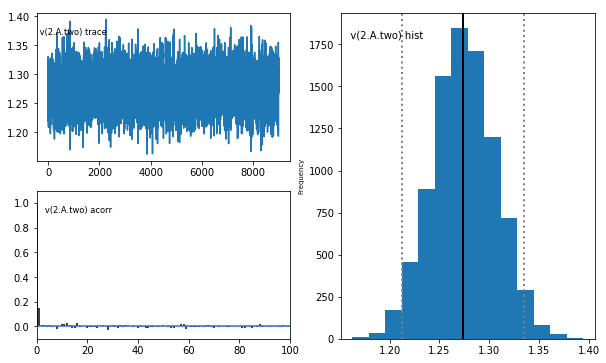

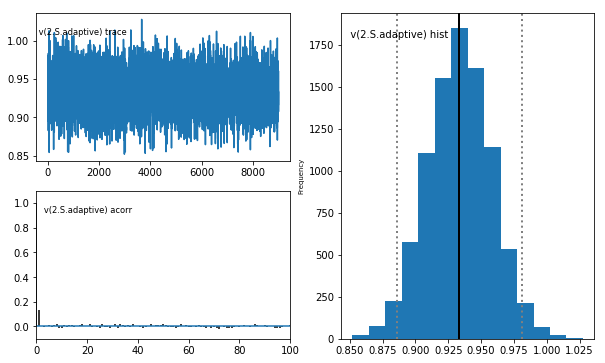

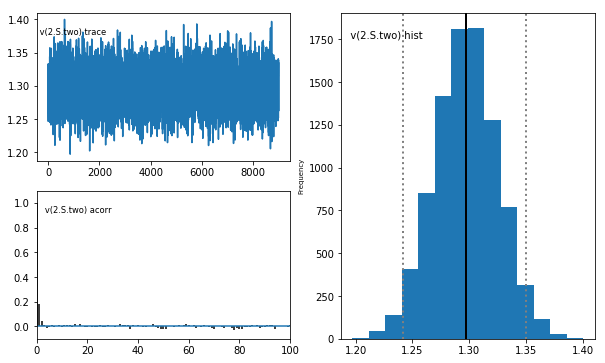

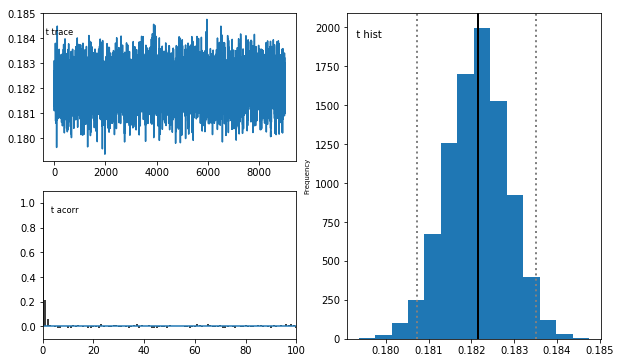

In [5]:
#this all looks really good
model_full.plot_posteriors(['a', 't', 'v', 'a_std','t_std','v_std'])

In [6]:
v_S1two, v_A1two, v_S1a, v_A1a=model_full.nodes_db.node[['v(1.S.two)', 'v(1.A.two)', 'v(1.S.adaptive)', 'v(1.A.adaptive)']]
v_S2two, v_A2two, v_S2a, v_A2a=model_full.nodes_db.node[['v(2.S.two)', 'v(2.A.two)', 'v(2.S.adaptive)', 'v(2.A.adaptive)']]

a_S1two, a_A1two, a_S1a, a_A1a=model_full.nodes_db.node[['a(1.S.two)', 'a(1.A.two)', 'a(1.S.adaptive)', 'a(1.A.adaptive)']]
a_S2two, a_A2two, a_S2a, a_A2a=model_full.nodes_db.node[['a(2.S.two)', 'a(2.A.two)', 'a(2.S.adaptive)', 'a(2.A.adaptive)']]


Text(0.5,1,'Posterior of response boundary group means, session 2')

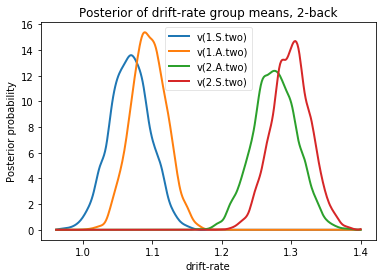

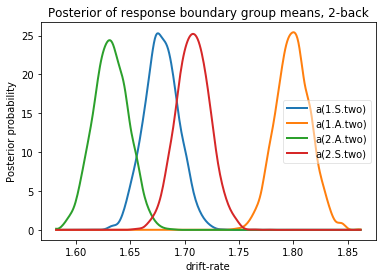

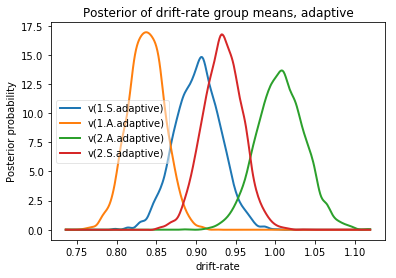

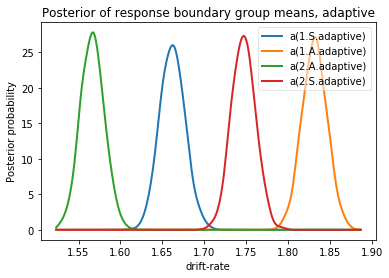

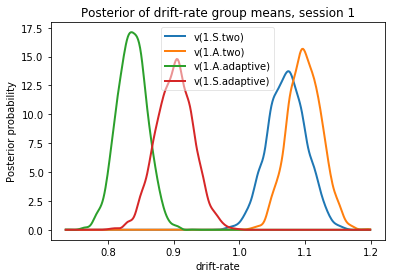

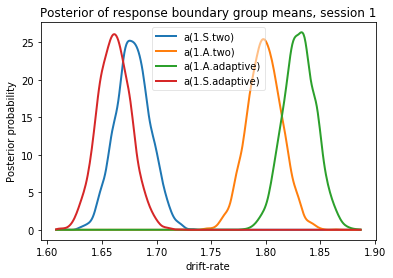

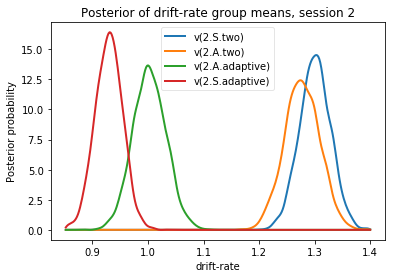

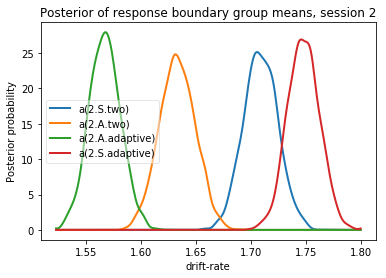

In [7]:
hddm.analyze.plot_posterior_nodes([v_S1two, v_A1two, v_A2two, v_S2two])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means, 2-back')

hddm.analyze.plot_posterior_nodes([a_S1two, a_A1two, a_A2two, a_S2two])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of response boundary group means, 2-back')


hddm.analyze.plot_posterior_nodes([v_S1a, v_A1a, v_A2a, v_S2a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means, adaptive')
hddm.analyze.plot_posterior_nodes([a_S1a, a_A1a, a_A2a, a_S2a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of response boundary group means, adaptive')


hddm.analyze.plot_posterior_nodes([v_S1two, v_A1two, v_A1a, v_S1a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means, session 1')

hddm.analyze.plot_posterior_nodes([a_S1two, a_A1two, a_A1a, a_S1a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of response boundary group means, session 1')


hddm.analyze.plot_posterior_nodes([v_S2two, v_A2two, v_A2a, v_S2a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means, session 2')
hddm.analyze.plot_posterior_nodes([a_S2two, a_A2two, a_A2a, a_S2a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of response boundary group means, session 2')

In [8]:
print "P_v(session 1 A two > session 1 S two) = ", (v_A1two.trace() > v_S1two.trace()).mean()
print "P_v(session 1 A adaptive < session 1 S adaptive) = ", (v_A1a.trace() < v_S1a.trace()).mean()
print "P_a(session 1 A two > session 1 S two) = ", (a_A1two.trace() > a_S1two.trace()).mean()
print "P_a(session 1 A adaptive > session 1 S adaptive) = ", (a_A1a.trace() > a_S1a.trace()).mean()
print "\n"
print "P_v(session 2 A two < session 2 S two) = ", (v_A2two.trace() < v_S2two.trace()).mean()
print "P_v(session 2 A adaptive > session 2 S adaptive) = ", (v_A2a.trace() > v_S2a.trace()).mean()
print "P_a(session 2 A two > session 2 S two) = ", (a_A1two.trace() > a_S2two.trace()).mean()
print "P_a(session 2 A adaptive < session 2 S adaptive) = ", (a_A2a.trace() < a_S2a.trace()).mean()


P_v(session 1 A two > session 1 S two) =  0.7547777777777778
P_v(session 1 A adaptive < session 1 S adaptive) =  0.9598888888888889
P_a(session 1 A two > session 1 S two) =  1.0
P_a(session 1 A adaptive > session 1 S adaptive) =  1.0


P_v(session 2 A two < session 2 S two) =  0.7061111111111111
P_v(session 2 A adaptive > session 2 S adaptive) =  0.9712222222222222
P_a(session 2 A two > session 2 S two) =  1.0
P_a(session 2 A adaptive < session 2 S adaptive) =  1.0


In [9]:
#try a model with nondecision time varying
model_full_witht = hddm.HDDM(data, depends_on={'v': 'fullinter', 'a': 'fullinter', 't': 'fullinter'}) #t, resp boundary and drift rate vary by all conditions
model_full_witht.find_starting_values() #get starting sampling values
model_full_witht.sample(10000, burn=1000) #fit the model

-14681.1860911
-14681.1616289
 [-----------------100%-----------------] 10001 of 10000 complete in 768.1 sec

In [12]:
#compare models, lower is better so the full model is best
print "Simplest model DIC: %f" % model_simple.dic
print "Session only model DIC: %f" % model_session.dic
print "Full model DIC: %f" % model_full.dic
print "Nondecision time model DIC: %f" % model_full_witht.dic
print "\n"
#this one puts a penalty on more complexity, still looks like the full model is best
print "Simplest model BIC: %f" % model_simple.bic
print "Session only model BIC: %f" % model_session.bic
print "Full model BIC: %f" % model_full.bic
print "Nondecision time model BIC: %f" % model_full_witht.bic


Simplest model DIC: 30121.804412
Session only model DIC: 29946.730458
Full model DIC: 29512.356106
Nondecision time model DIC: 29372.111286


Simplest model BIC: 30145.889855
Session only model BIC: 29987.017979
Full model BIC: 29649.124392
Nondecision time model BIC: 29565.258557


Plotting a(1.A.adaptive)
Plotting a(1.A.two)
Plotting a(1.S.adaptive)
Plotting a(1.S.two)
Plotting a(2.A.adaptive)
Plotting a(2.A.two)
Plotting a(2.S.adaptive)
Plotting a(2.S.two)
Plotting v(1.A.adaptive)
Plotting v(1.A.two)
Plotting v(1.S.adaptive)
Plotting v(1.S.two)
Plotting v(2.A.adaptive)
Plotting v(2.A.two)
Plotting v(2.S.adaptive)
Plotting v(2.S.two)
Plotting t(1.A.adaptive)
Plotting t(1.A.two)
Plotting t(1.S.adaptive)
Plotting t(1.S.two)
Plotting t(2.A.adaptive)
Plotting t(2.A.two)


/Users/mimburgi/anaconda3/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting t(2.S.adaptive)
Plotting t(2.S.two)


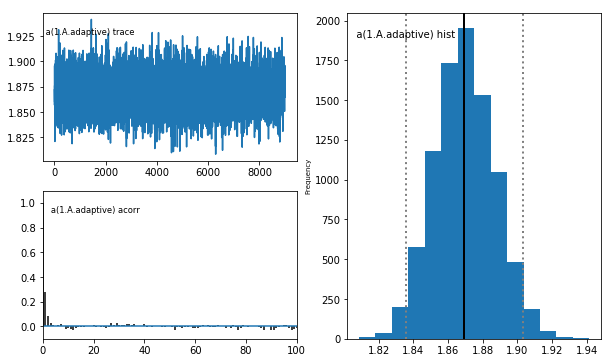

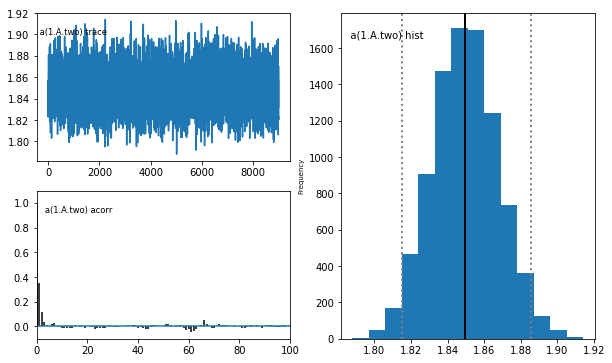

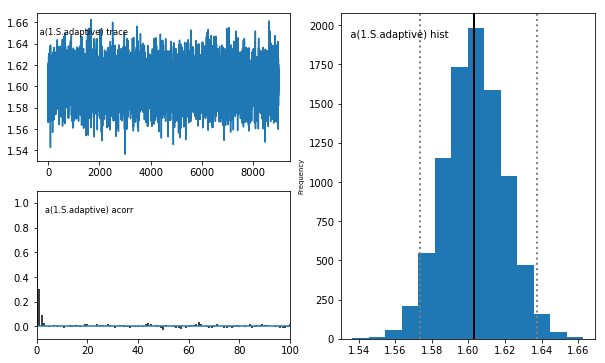

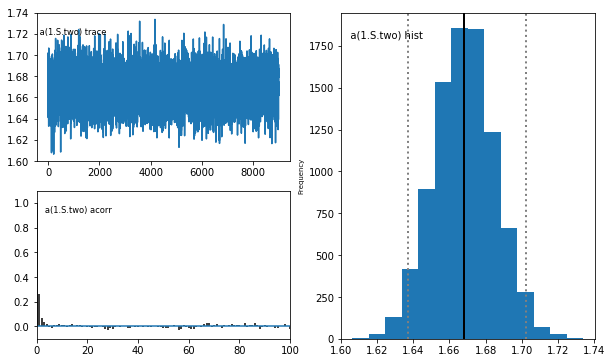

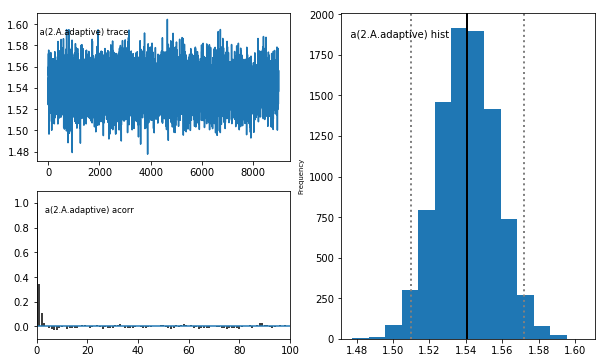

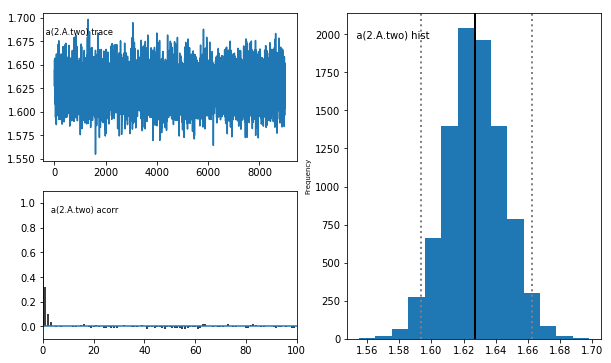

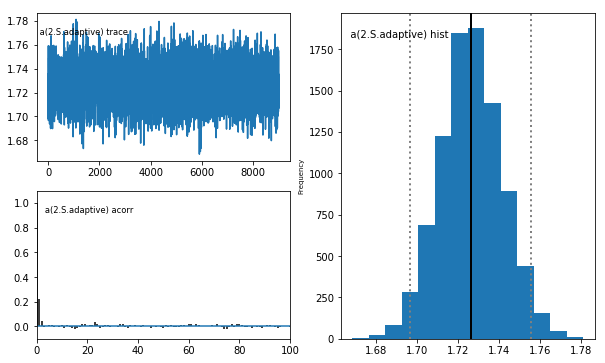

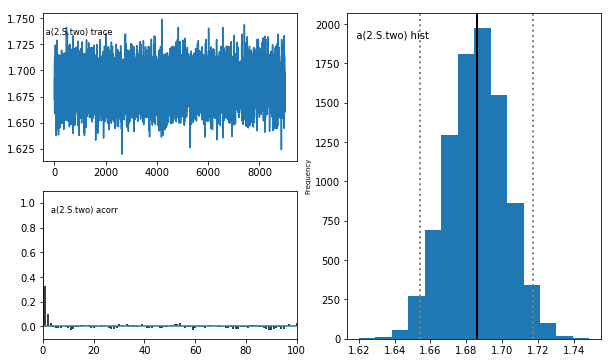

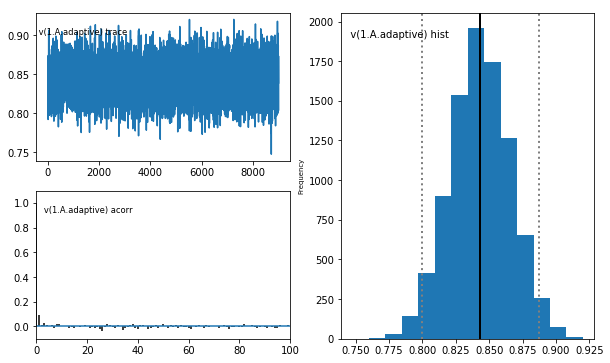

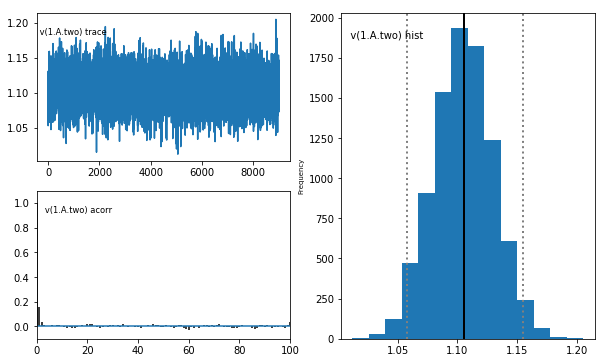

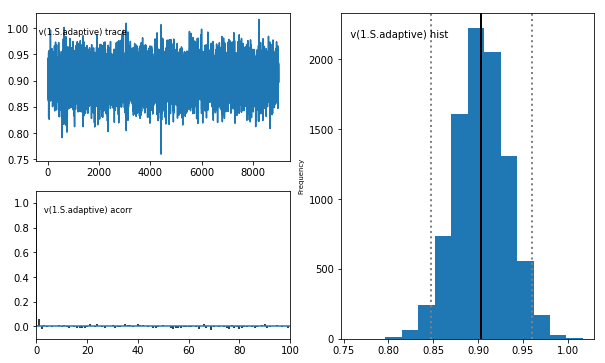

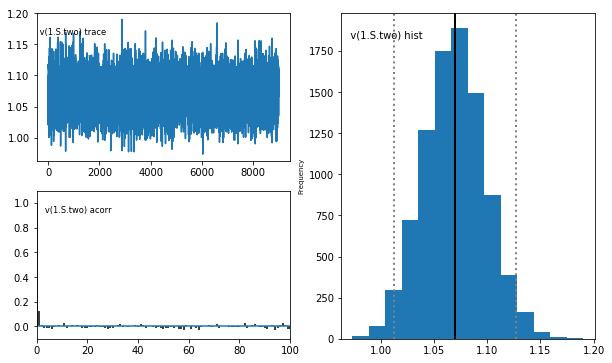

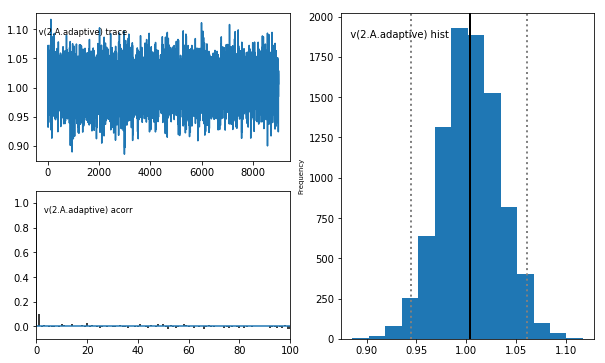

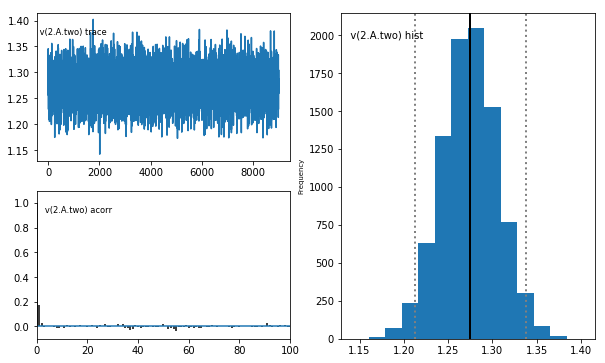

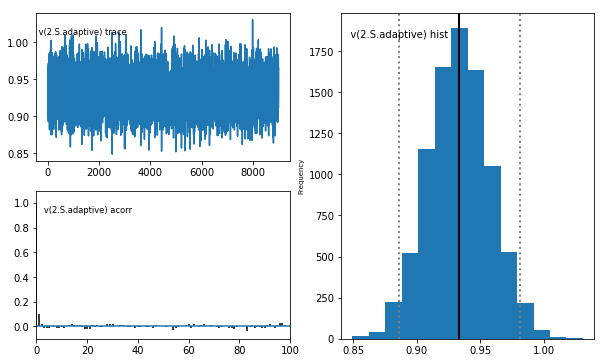

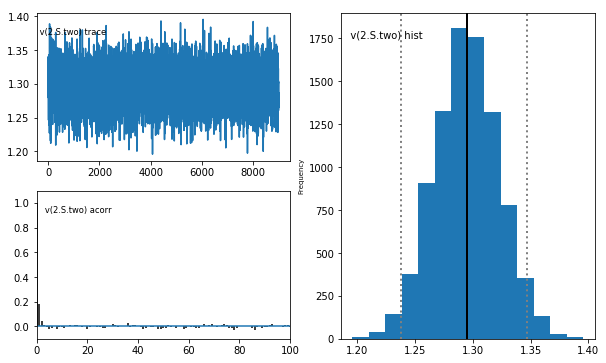

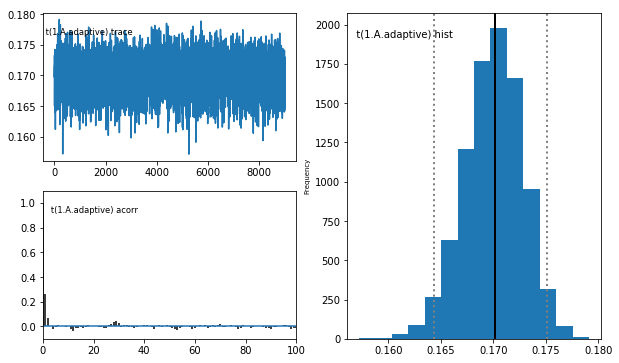

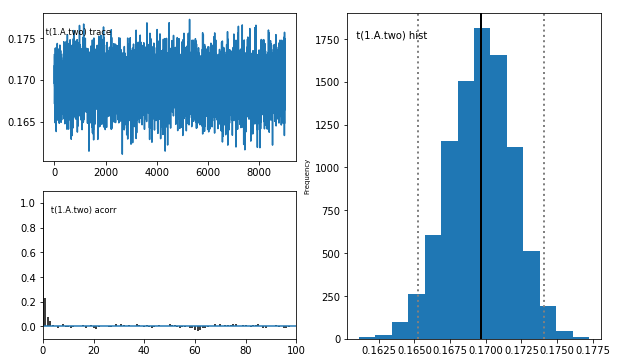

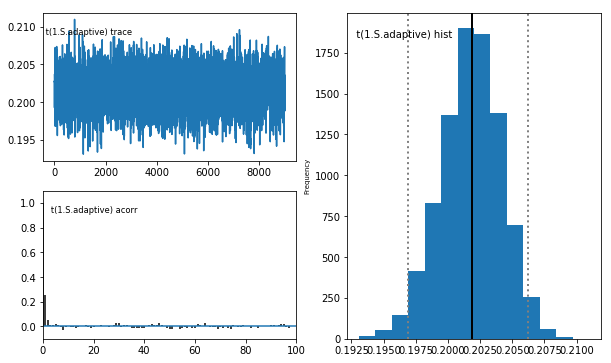

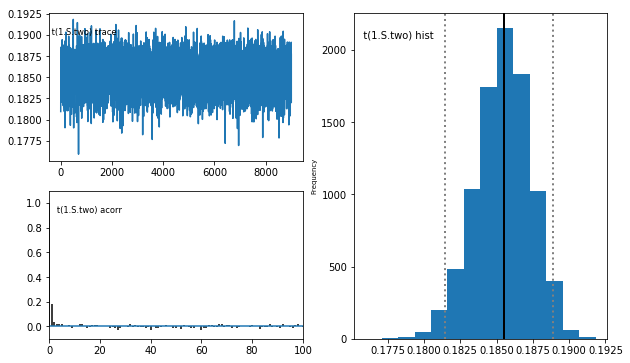

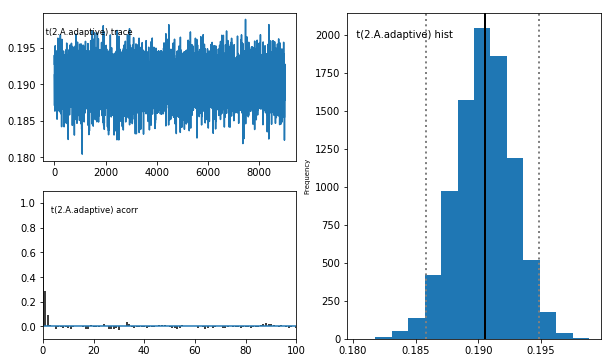

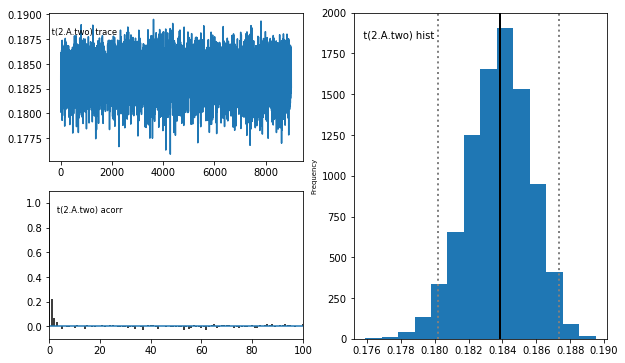

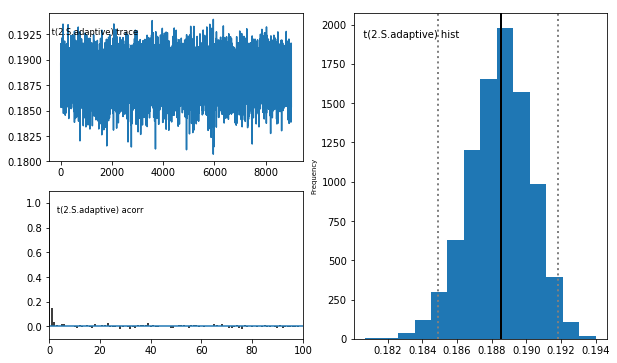

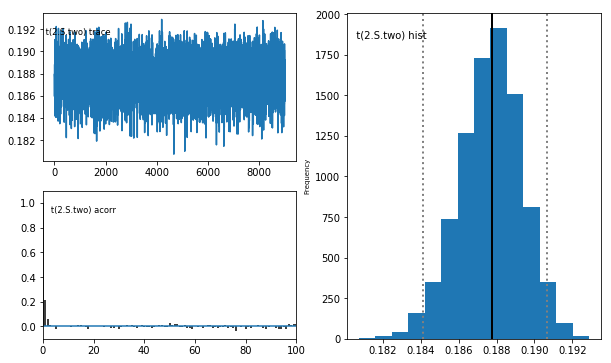

In [13]:
model_full_witht.plot_posteriors(['a', 't', 'v', 'a_std','t_std','v_std'])

In [15]:
v_S1two, v_A1two, v_S1a, v_A1a=model_full_witht.nodes_db.node[['v(1.S.two)', 'v(1.A.two)', 'v(1.S.adaptive)', 'v(1.A.adaptive)']]
v_S2two, v_A2two, v_S2a, v_A2a=model_full_witht.nodes_db.node[['v(2.S.two)', 'v(2.A.two)', 'v(2.S.adaptive)', 'v(2.A.adaptive)']]

a_S1two, a_A1two, a_S1a, a_A1a=model_full_witht.nodes_db.node[['a(1.S.two)', 'a(1.A.two)', 'a(1.S.adaptive)', 'a(1.A.adaptive)']]
a_S2two, a_A2two, a_S2a, a_A2a=model_full_witht.nodes_db.node[['a(2.S.two)', 'a(2.A.two)', 'a(2.S.adaptive)', 'a(2.A.adaptive)']]

t_S1two, t_A1two, t_S1a, t_A1a=model_full_witht.nodes_db.node[['t(1.S.two)', 't(1.A.two)', 't(1.S.adaptive)', 't(1.A.adaptive)']]
t_S2two, t_A2two, t_S2a, t_A2a=model_full_witht.nodes_db.node[['t(2.S.two)', 't(2.A.two)', 't(2.S.adaptive)', 't(2.A.adaptive)']]

Text(0.5,1,'Posterior of nondecision time group means, session 2')

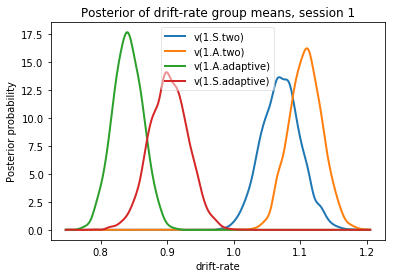

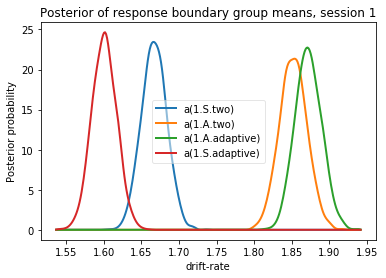

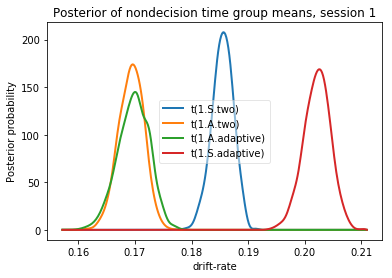

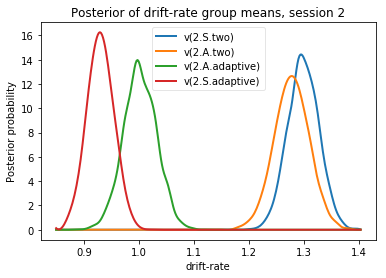

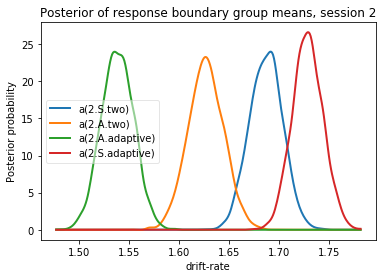

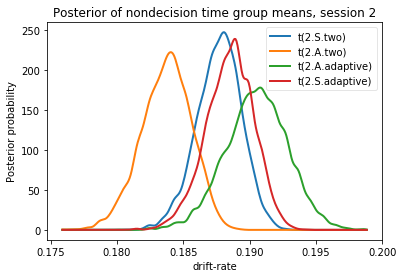

In [16]:
hddm.analyze.plot_posterior_nodes([v_S1two, v_A1two, v_A1a, v_S1a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means, session 1')
hddm.analyze.plot_posterior_nodes([a_S1two, a_A1two, a_A1a, a_S1a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of response boundary group means, session 1')
hddm.analyze.plot_posterior_nodes([t_S1two, t_A1two, t_A1a, t_S1a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of nondecision time group means, session 1')

hddm.analyze.plot_posterior_nodes([v_S2two, v_A2two, v_A2a, v_S2a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means, session 2')
hddm.analyze.plot_posterior_nodes([a_S2two, a_A2two, a_A2a, a_S2a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of response boundary group means, session 2')
hddm.analyze.plot_posterior_nodes([t_S2two, t_A2two, t_A2a, t_S2a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of nondecision time group means, session 2')

In [18]:
print "P_v(session 1 A two > session 1 S two) = ", (v_A1two.trace() > v_S1two.trace()).mean()
print "P_v(session 1 A adaptive < session 1 S adaptive) = ", (v_A1a.trace() < v_S1a.trace()).mean()
print "P_a(session 1 A two > session 1 S two) = ", (a_A1two.trace() > a_S1two.trace()).mean()
print "P_a(session 1 A adaptive > session 1 S adaptive) = ", (a_A1a.trace() > a_S1a.trace()).mean()
print "P_t(session 1 A two < session 1 S two) = ", (t_A1two.trace() < t_S1two.trace()).mean()
print "P_t(session 1 A adaptive < session 1 S adaptive) = ", (t_A1a.trace() < t_S1a.trace()).mean()
print "\n"
print "P_v(session 2 A two < session 2 S two) = ", (v_A2two.trace() < v_S2two.trace()).mean()
print "P_v(session 2 A adaptive > session 2 S adaptive) = ", (v_A2a.trace() > v_S2a.trace()).mean()
print "P_a(session 2 A two > session 2 S two) = ", (a_A1two.trace() > a_S2two.trace()).mean()
print "P_a(session 2 A adaptive < session 2 S adaptive) = ", (a_A2a.trace() < a_S2a.trace()).mean()
print "P_t(session 1 A two < session 2 S two) = ", (t_A2two.trace() < t_S2two.trace()).mean()
print "P_t(session 1 A adaptive > session 2 S adaptive) = ", (t_A2a.trace() > t_S2a.trace()).mean()


P_v(session 1 A two > session 1 S two) =  0.8185555555555556
P_v(session 1 A adaptive < session 1 S adaptive) =  0.9516666666666667
P_a(session 1 A two > session 1 S two) =  1.0
P_a(session 1 A adaptive > session 1 S adaptive) =  1.0
P_t(session 1 A two < session 1 S two) =  1.0
P_t(session 1 A adaptive < session 1 S adaptive) =  1.0


P_v(session 2 A two < session 2 S two) =  0.6847777777777778
P_v(session 2 A adaptive > session 2 S adaptive) =  0.9661111111111111
P_a(session 2 A two > session 2 S two) =  1.0
P_a(session 2 A adaptive < session 2 S adaptive) =  1.0
P_t(session 1 A two < session 2 S two) =  0.943
P_t(session 1 A adaptive > session 2 S adaptive) =  0.7524444444444445


In [19]:
print "\n"
print "P_t(session 2 A adaptive < session 1 A adaptive) = ", (t_A2a.trace() < t_A1a.trace()).mean()



P_t(session 2 A adaptive < session 1 A adaptive) =  0.0


In [26]:
print "\n"
print "P_t(session 2 A adaptive > session 1 A adaptive) = ", (t_A2a.trace() > t_A1a.trace()).mean()
print "P_t(session 2 S adaptive < session 1 S adaptive) = ", (t_S2a.trace() < t_S1a.trace()).mean()



P_t(session 2 A adaptive > session 1 A adaptive) =  1.0
P_t(session 2 S adaptive < session 1 S adaptive) =  1.0


In [31]:
##########################
#below is drift rate only#
##########################
model_drift = hddm.HDDM(data, depends_on={'v': 'fullinter'}) #resp boundary and drift rate don't vary, for comparison
model_drift.find_starting_values() #get starting sampling values
model_drift.sample(10000, burn=1000) #fit the model


-14875.3925228
-14875.3876904
 [-----------------100%-----------------] 10000 of 10000 complete in 839.6 sec

In [33]:
v_S1two, v_A1two, v_S1a, v_A1a=model_drift.nodes_db.node[['v(1.S.two)', 'v(1.A.two)', 'v(1.S.adaptive)', 'v(1.A.adaptive)']]
v_S2two, v_A2two, v_S2a, v_A2a=model_drift.nodes_db.node[['v(2.S.two)', 'v(2.A.two)', 'v(2.S.adaptive)', 'v(2.A.adaptive)']]

Text(0.5,1,'Posterior of drift-rate group means, session 2')

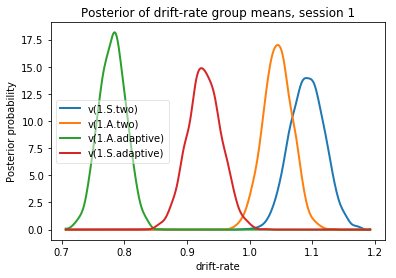

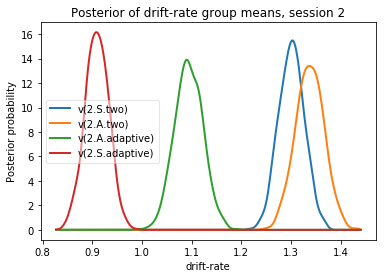

In [34]:
hddm.analyze.plot_posterior_nodes([v_S1two, v_A1two, v_A1a, v_S1a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means, session 1')

hddm.analyze.plot_posterior_nodes([v_S2two, v_A2two, v_A2a, v_S2a])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means, session 2')